In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn :: models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set_style('whitegrid')

# Problem definition

Apply classification models to predict customers default payments

# Load the data

In [2]:
#source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
df_original = pd.read_csv('data/default of credit card clients.csv')
df = df_original.copy()
print(df.columns)
df.head()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# TODO: check for NaNs
df.isnull().sum(axis = 0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Feature Engineering 

In [4]:
# TODO: remove a confusing column
del df['ID']

In [5]:
# TODO: create a loop to transform the categorical columns to numerical
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df_dummies = pd.get_dummies(df[col])
    df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
    df = pd.concat([df, df_dummies], axis=1)
    # Remove the original columns
    del df[col]
df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [6]:
# feature engineering
X_columns = [x for x in df.columns if x != 'default payment next month']
y_column = ['default payment next month']

In [7]:
list(X_columns)

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX_1',
 'SEX_2',
 'EDUCATION_0',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'EDUCATION_5',
 'EDUCATION_6',
 'MARRIAGE_0',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'PAY_1_-2',
 'PAY_1_-1',
 'PAY_1_0',
 'PAY_1_1',
 'PAY_1_2',
 'PAY_1_3',
 'PAY_1_4',
 'PAY_1_5',
 'PAY_1_6',
 'PAY_1_7',
 'PAY_1_8',
 'PAY_2_-2',
 'PAY_2_-1',
 'PAY_2_0',
 'PAY_2_1',
 'PAY_2_2',
 'PAY_2_3',
 'PAY_2_4',
 'PAY_2_5',
 'PAY_2_6',
 'PAY_2_7',
 'PAY_2_8',
 'PAY_3_-2',
 'PAY_3_-1',
 'PAY_3_0',
 'PAY_3_1',
 'PAY_3_2',
 'PAY_3_3',
 'PAY_3_4',
 'PAY_3_5',
 'PAY_3_6',
 'PAY_3_7',
 'PAY_3_8',
 'PAY_4_-2',
 'PAY_4_-1',
 'PAY_4_0',
 'PAY_4_1',
 'PAY_4_2',
 'PAY_4_3',
 'PAY_4_4',
 'PAY_4_5',
 'PAY_4_6',
 'PAY_4_7',
 'PAY_4_8',
 'PAY_5_-2',
 'PAY_5_-1',
 'PAY_5_0',
 'PAY_5_2',
 'PAY_5_3',
 'PAY_5_4',
 'PAY_5_5',
 '

# Model Training

In [8]:
# split the data

threshold = 0.8
X = df[X_columns]
y = df[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (24000, 91)
y_train (24000, 1)
X_test (6000, 91)
y_test (6000, 1)


# Model Training / Evaluation - Using Split

In [9]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())    
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']
df_results = df_results.sort_values(by='precision', ascending=False)
df_results

MODEL Naive Bayes
[[1005 3680]
 [ 124 1191]]
Precision 0.2445083145144734
Recall 0.905703422053232

MODEL RandomForestClassifier10
[[4419  266]
 [ 879  436]]
Precision 0.6210826210826211
Recall 0.3315589353612167
Feature Importance
            0         1
1         AGE  0.064593
2   BILL_AMT1  0.060901
0   LIMIT_BAL  0.058225
3   BILL_AMT2  0.050514
5   BILL_AMT4  0.049972
31    PAY_1_2  0.049687
8    PAY_AMT1  0.049679
7   BILL_AMT6  0.048329
4   BILL_AMT3  0.048298
6   BILL_AMT5  0.047486

MODEL RandomForestClassifier100
[[4415  270]
 [ 802  513]]
Precision 0.6551724137931034
Recall 0.39011406844106467
Feature Importance
            0         1
1         AGE  0.064922
0   LIMIT_BAL  0.060125
2   BILL_AMT1  0.057804
3   BILL_AMT2  0.051991
4   BILL_AMT3  0.049613
31    PAY_1_2  0.049165
8    PAY_AMT1  0.049149
7   BILL_AMT6  0.048397
5   BILL_AMT4  0.048110
6   BILL_AMT5  0.046993

MODEL KNeighborsClassifier
[[4315  370]
 [1064  251]]
Precision 0.40418679549114334
Recall 0.19087452471

,model,precision,recall
2,RandomForestClassifier100,0.655172,0.390114
1,RandomForestClassifier10,0.621083,0.331559
3,KNeighborsClassifier,0.404187,0.190875
4,DecisionTreeClassifier,0.374720,0.380989
0,Naive Bayes,0.244508,0.905703


# Model Training / Evaluation - Cross Validation

MODEL Naive Bayes
MODEL RandomForestClassifier10
MODEL RandomForestClassifier100
MODEL KNeighborsClassifier
MODEL DecisionTreeClassifier


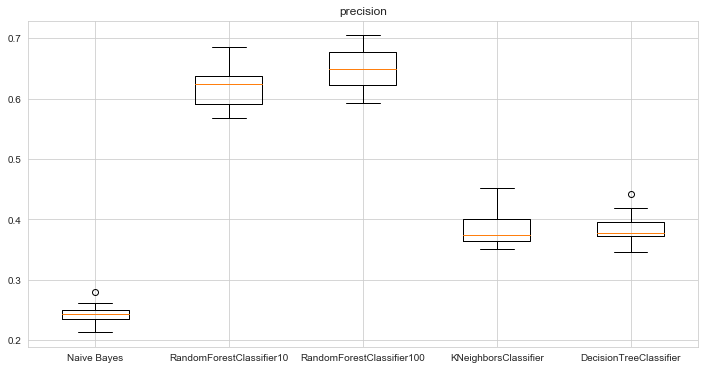

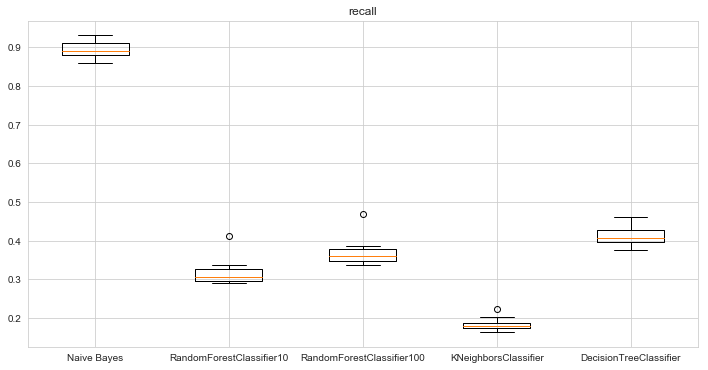

In [10]:
k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)
for metric in ['precision', 'recall']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

# Tuning the Thresholds

In [12]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
for i in range(1,10):
    print(i)
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred = [1 if x > i/10.0 else 0 for x in y_pred]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1
[[ 832 1505]
 [  46  617]]
Precision 0.29076343072573047
Recall 0.9306184012066365
2
[[1642  695]
 [ 198  465]]
Precision 0.40086206896551724
Recall 0.7013574660633484
3
[[2002  335]
 [ 298  365]]
Precision 0.5214285714285715
Recall 0.55052790346908
4
[[2126  211]
 [ 364  299]]
Precision 0.5862745098039216
Recall 0.45098039215686275
5
[[2219  118]
 [ 430  233]]
Precision 0.6638176638176638
Recall 0.3514328808446455
6
[[2268   69]
 [ 486  177]]
Precision 0.7195121951219512
Recall 0.2669683257918552
7
[[2307   30]
 [ 559  104]]
Precision 0.7761194029850746
Recall 0.1568627450980392
8
[[2328    9]
 [ 621   42]]
Precision 0.8235294117647058
Recall 0.06334841628959276
9
[[2335    2]
 [ 648   15]]
Precision 0.8823529411764706
Recall 0.02262443438914027
